#Библиотеки

In [1]:
import pandas as pd
import missingno as msno
from statsmodels.stats.proportion import proportions_ztest

#<h1>Подготовительная работа<h1>

##<h2>Датасет session<h2>

In [2]:
df_sessions = pd.read_csv('work/ga_sessions.csv')
df_sessions

C:\Users\Danil\AppData\Local\Temp\ipykernel_3416\2738277892.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sessions = pd.read_csv('work/ga_sessions.csv')


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,9055415581448263752.1640159305.1640159305,2108378238.164016,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,VlqBmecIOXWjCWUmQkLd,desktop,Windows,NaN,NaN,1920x1080,Chrome,Russia,Moscow
1860038,9055421130527858185.1622007305.1622007305,2108379530.162201,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,390x844,Safari,Russia,Stavropol
1860039,9055422955903931195.1636979515.1636979515,2108379955.163697,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,NaN,375x667,Safari,Russia,Moscow
1860040,905543020766873816.1638189404.1638189404,210838164.163819,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,NaN,393x851,Chrome,Russia,Chelyabinsk


###инфо о датасете

In [3]:
df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB


In [4]:
df_sessions.describe(include='all')

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
count,1860042,1.860042e+06,1860042,1860042,1.860042e+06,1859945,1860042,1640439,1524427,777981,1860042,789904,1492864,16338,1860042,1860042,1860042,1860042
unique,1860042,1.391717e+06,226,85318,NaN,293,56,412,286,1219,3,13,205,104,5039,57,166,2548
top,9055434745589932991.1637753792.1637753792,1.750498e+09,2021-05-24,12:00:00,NaN,ZpYIoDJMcFzVoPFsHGJL,banner,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Apple,AuMdmADEIoPXiWpTsBEj,414x896,Chrome,Russia,Moscow
freq,1,4.620000e+02,39453,61067,NaN,578290,552272,463481,1006599,506819,1474871,464054,551088,9778,169090,1013436,1800565,805329
mean,NaN,NaN,NaN,NaN,2.712804e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.182907e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## <h2>Датасет hits<h2>

In [5]:
df_hits = pd.read_csv('work/ga_hits.csv')
df_hits

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,2021-12-23,810589.0,43,event,NaN,sberauto.com/cars/all/toyota/fortuner/24cb5af2...,quiz,quiz_show,NaN,NaN
15726466,7310304587364460692.1640261783.1640261783,2021-12-23,904927.0,40,event,NaN,sberauto.com/cars/all/mercedes-benz/gla-klasse...,quiz,quiz_show,NaN,NaN
15726467,8013702685784312179.1640270195.1640270195,2021-12-23,2172865.0,43,event,NaN,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,quiz,quiz_show,NaN,NaN
15726468,8021505554734405918.1640257821.1640257821,2021-12-23,713325.0,45,event,NaN,sberauto.com/cars/all/bmw/x3/6a660f0a?rental_p...,quiz,quiz_show,NaN,NaN


###инфо о датасете

In [6]:
df_hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ GB


In [7]:
df_hits.describe(include='all')

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
count,15726470,15726470,6.566148e+06,1.572647e+07,15726470,9451666,15726470,15726470,15726470,11966286,0.0
unique,1734610,226,NaN,NaN,1,37873,342715,52,230,39825,NaN
top,5442565791571325612.1632449195.1632449195,2021-05-24,NaN,NaN,event,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,card_web,view_card,KclpemfoHstknWHFiLit,NaN
freq,768,513035,NaN,NaN,15726470,8879187,2793639,7456998,3558985,6505447,NaN
mean,NaN,NaN,2.091050e+05,2.356715e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,4.032110e+05,2.887713e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000e+00,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.412000e+04,7.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,8.994100e+04,1.500000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.195352e+05,2.900000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Разведочный анализ данных

##Удаление неинформативных колонок

<Axes: >

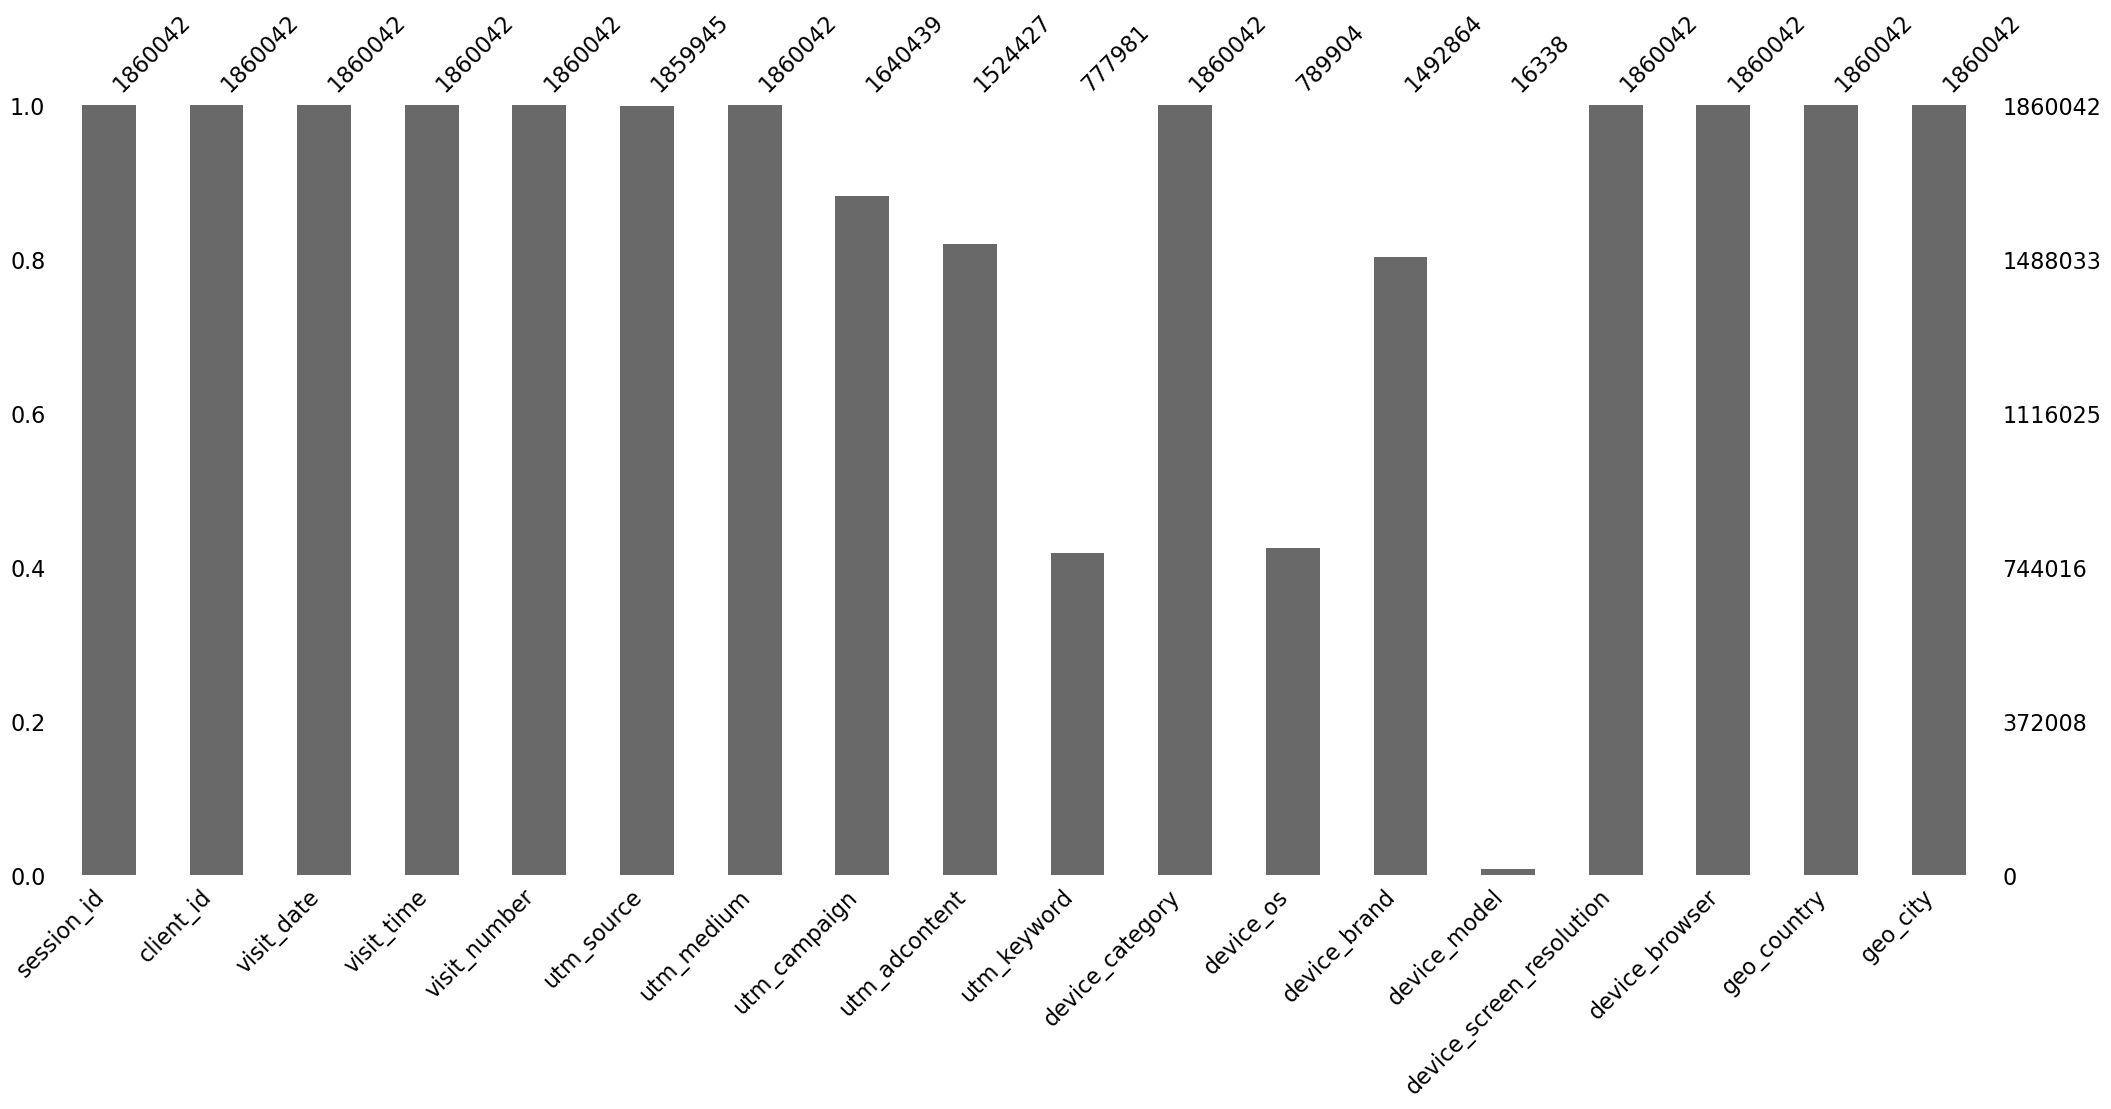

In [8]:
msno.bar(df_sessions)

<Axes: >

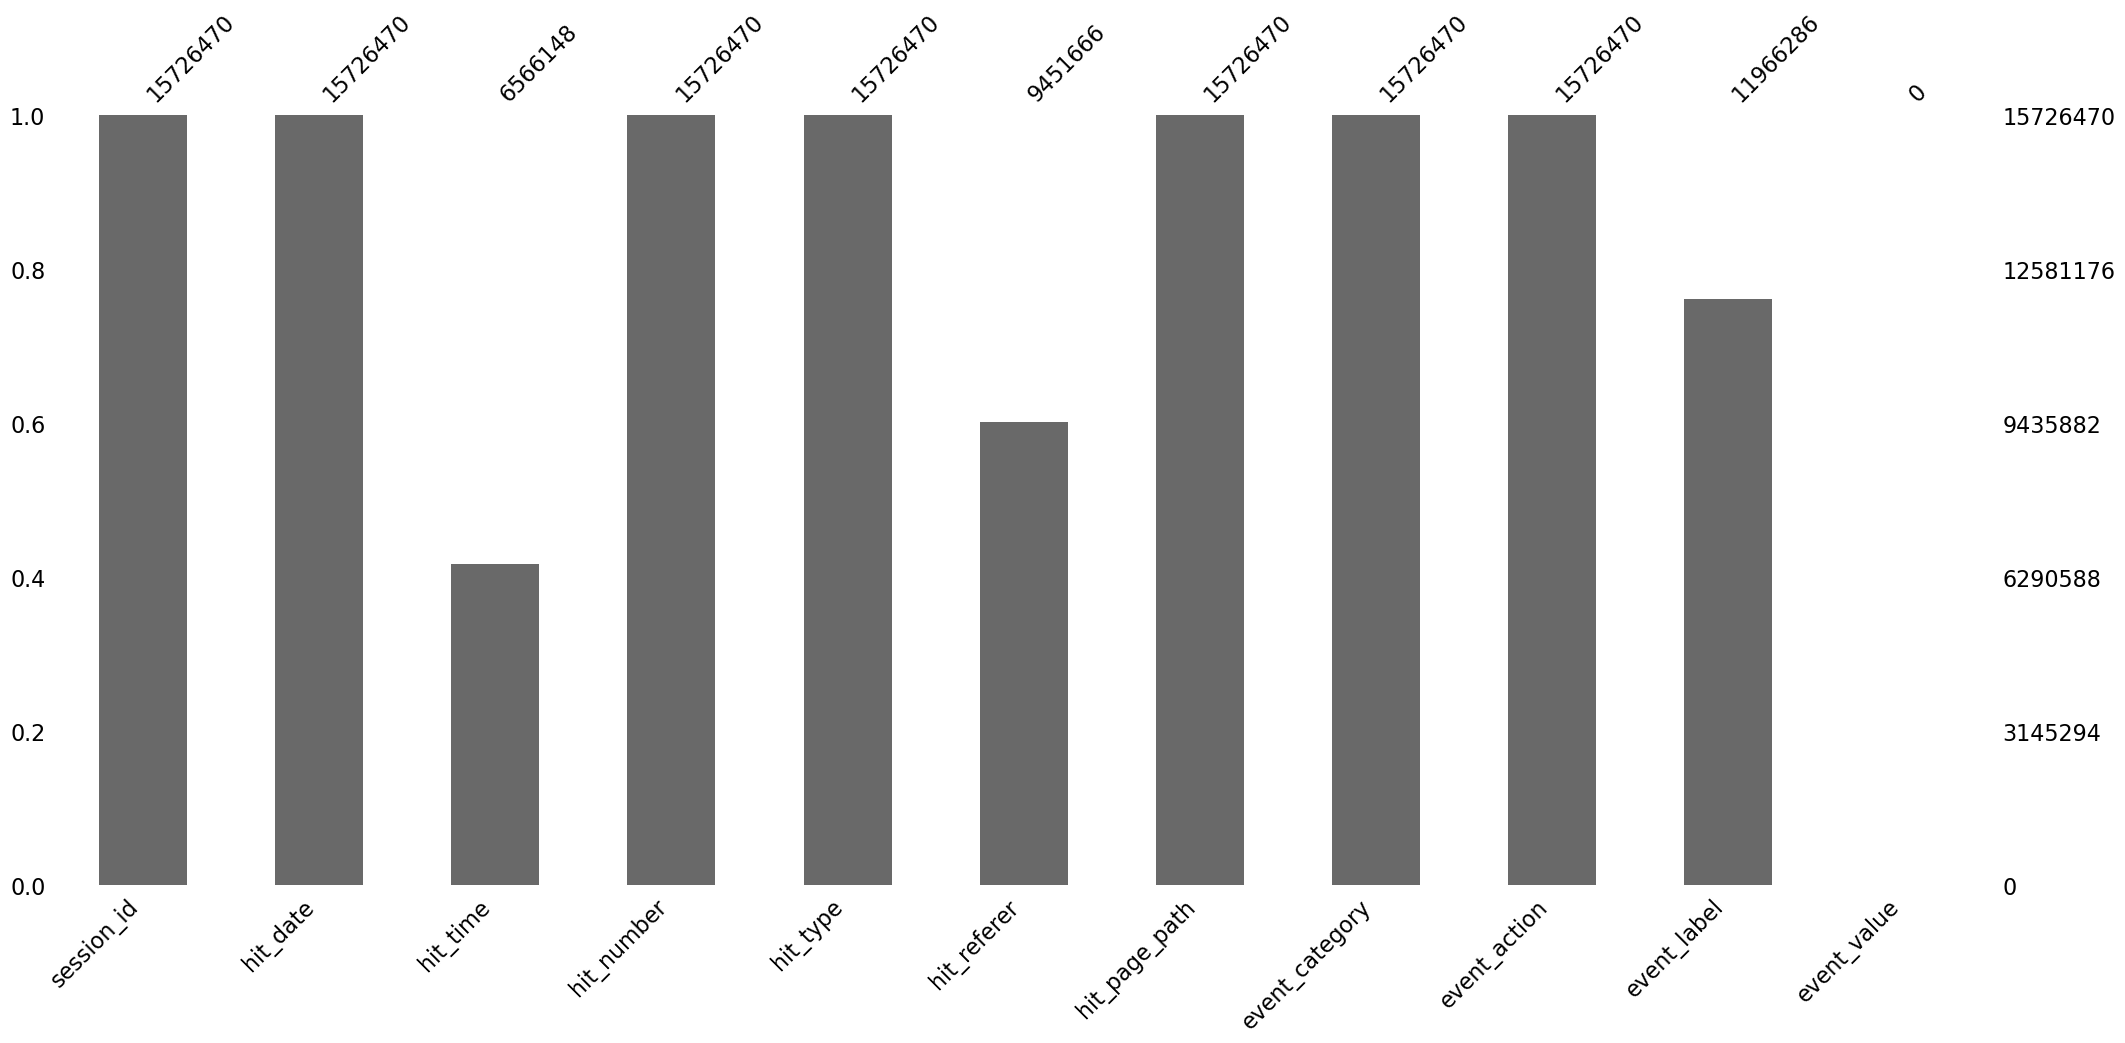

In [9]:
msno.bar(df_hits)

In [10]:
df_sessions_copy=df_sessions.copy()
df_hits_copy=df_hits.copy()

<Axes: >

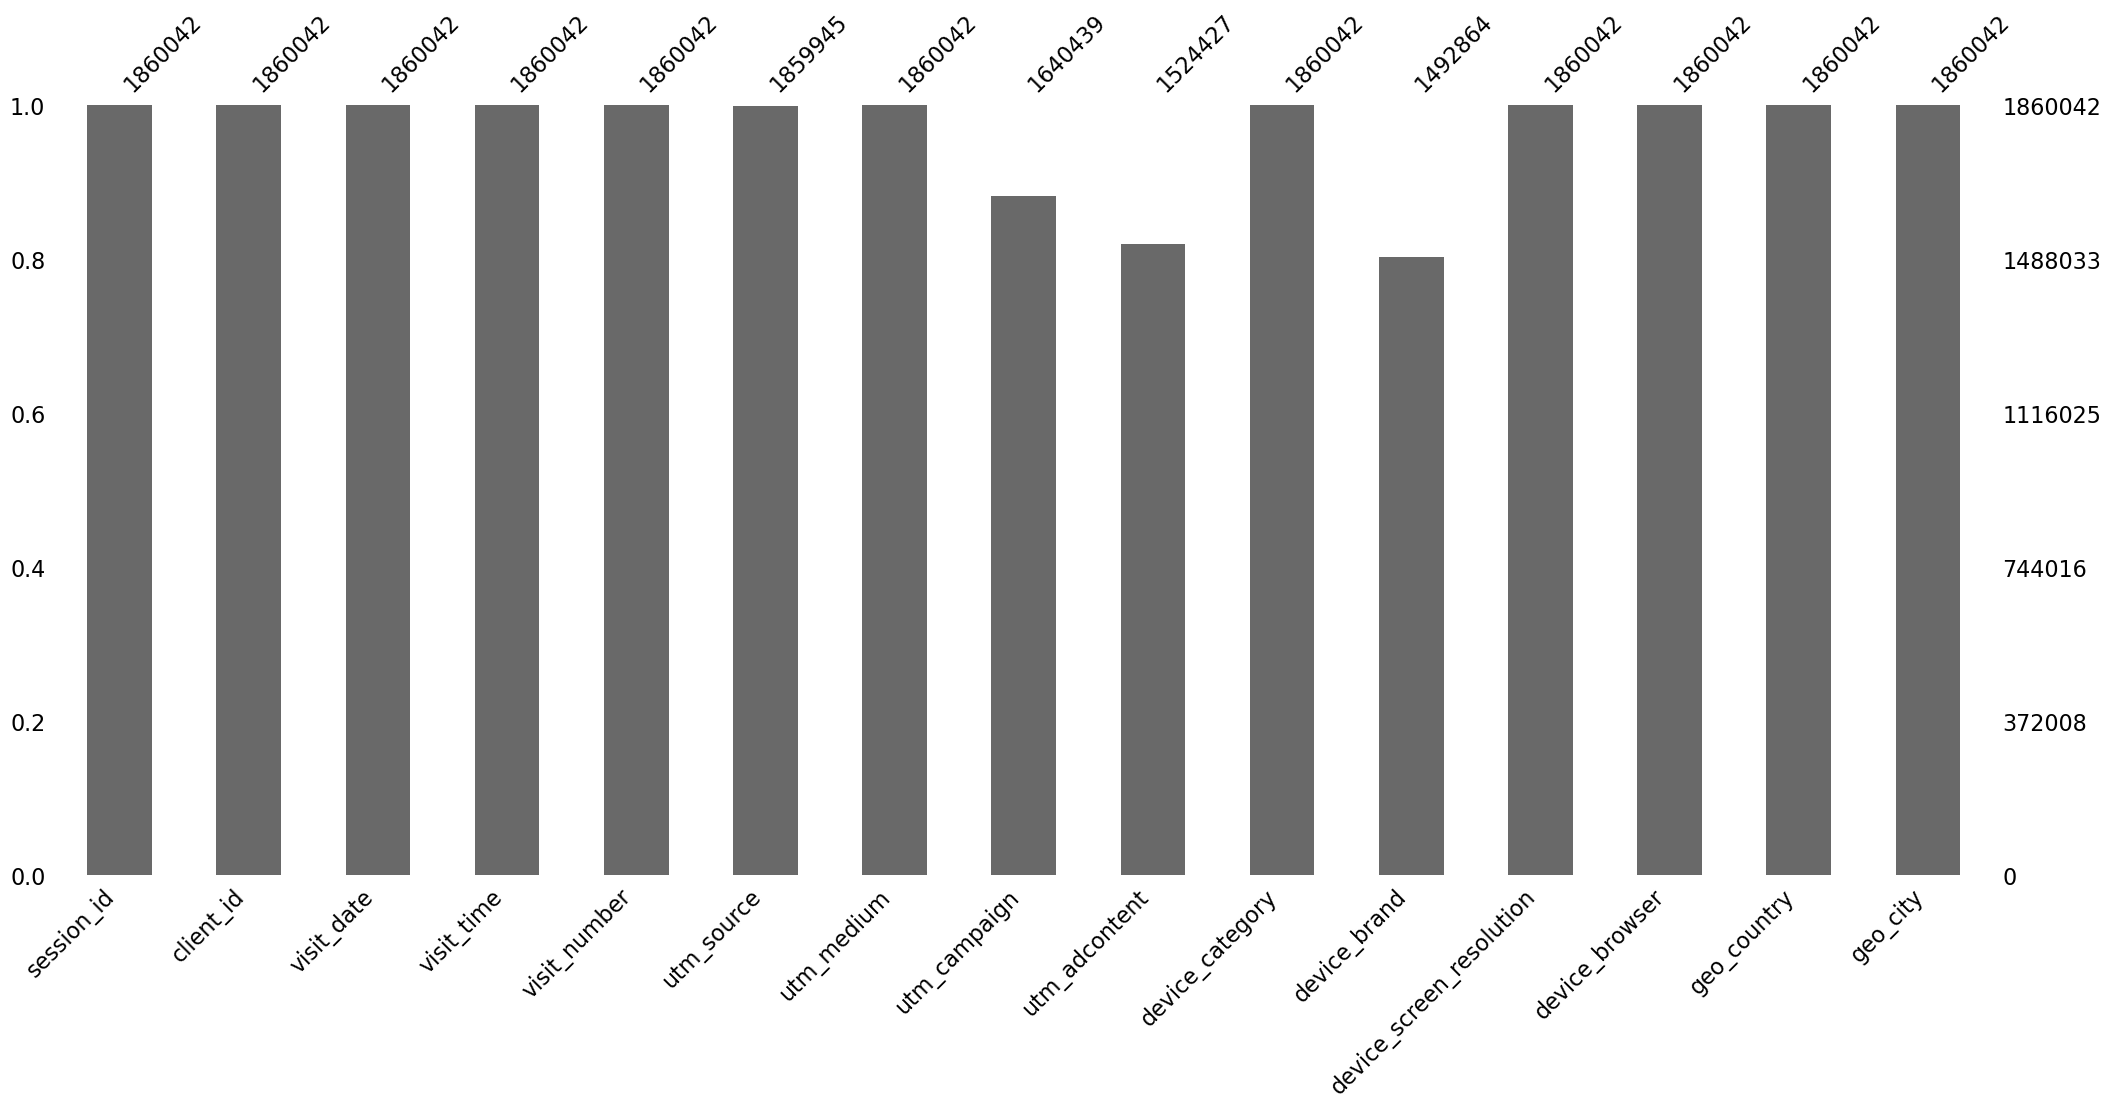

In [11]:
df_sessions = df_sessions.drop(columns=['device_model', 'utm_keyword', 'device_os'])
msno.bar(df_sessions)

<Axes: >

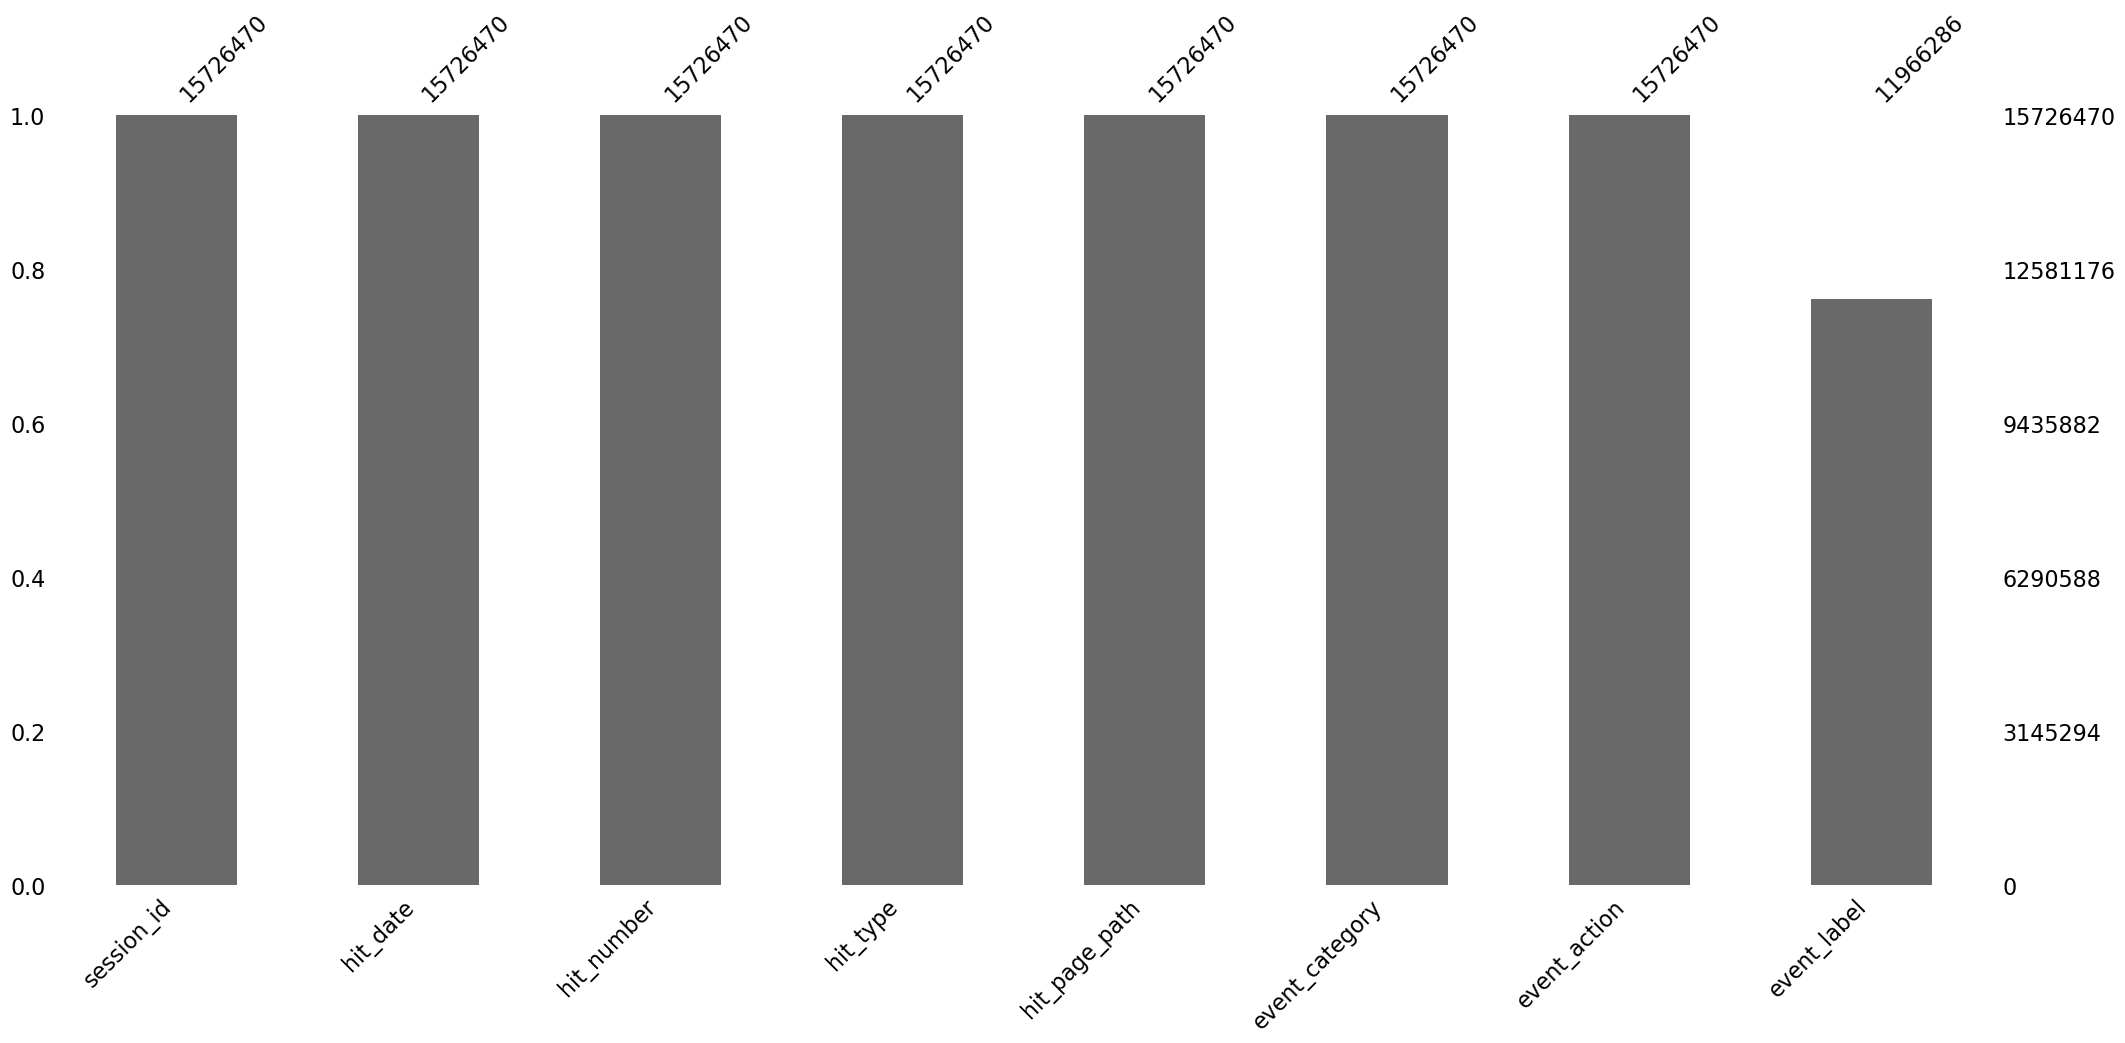

In [12]:
df_hits = df_hits.drop(columns=['hit_time', 'hit_referer', 'event_value'])
msno.bar(df_hits)

##Устранение пропусков

###На датасете sessions

In [13]:
df_sessions.shape

(1860042, 15)

In [14]:
df_sessions['device_brand'] = df_sessions.groupby('device_category')['device_brand'].apply(lambda x: x.fillna(x.mode()[0])).reset_index(drop=True)

In [15]:
df_sessions['utm_source'] = df_sessions['utm_source'].fillna('other')

<Axes: >

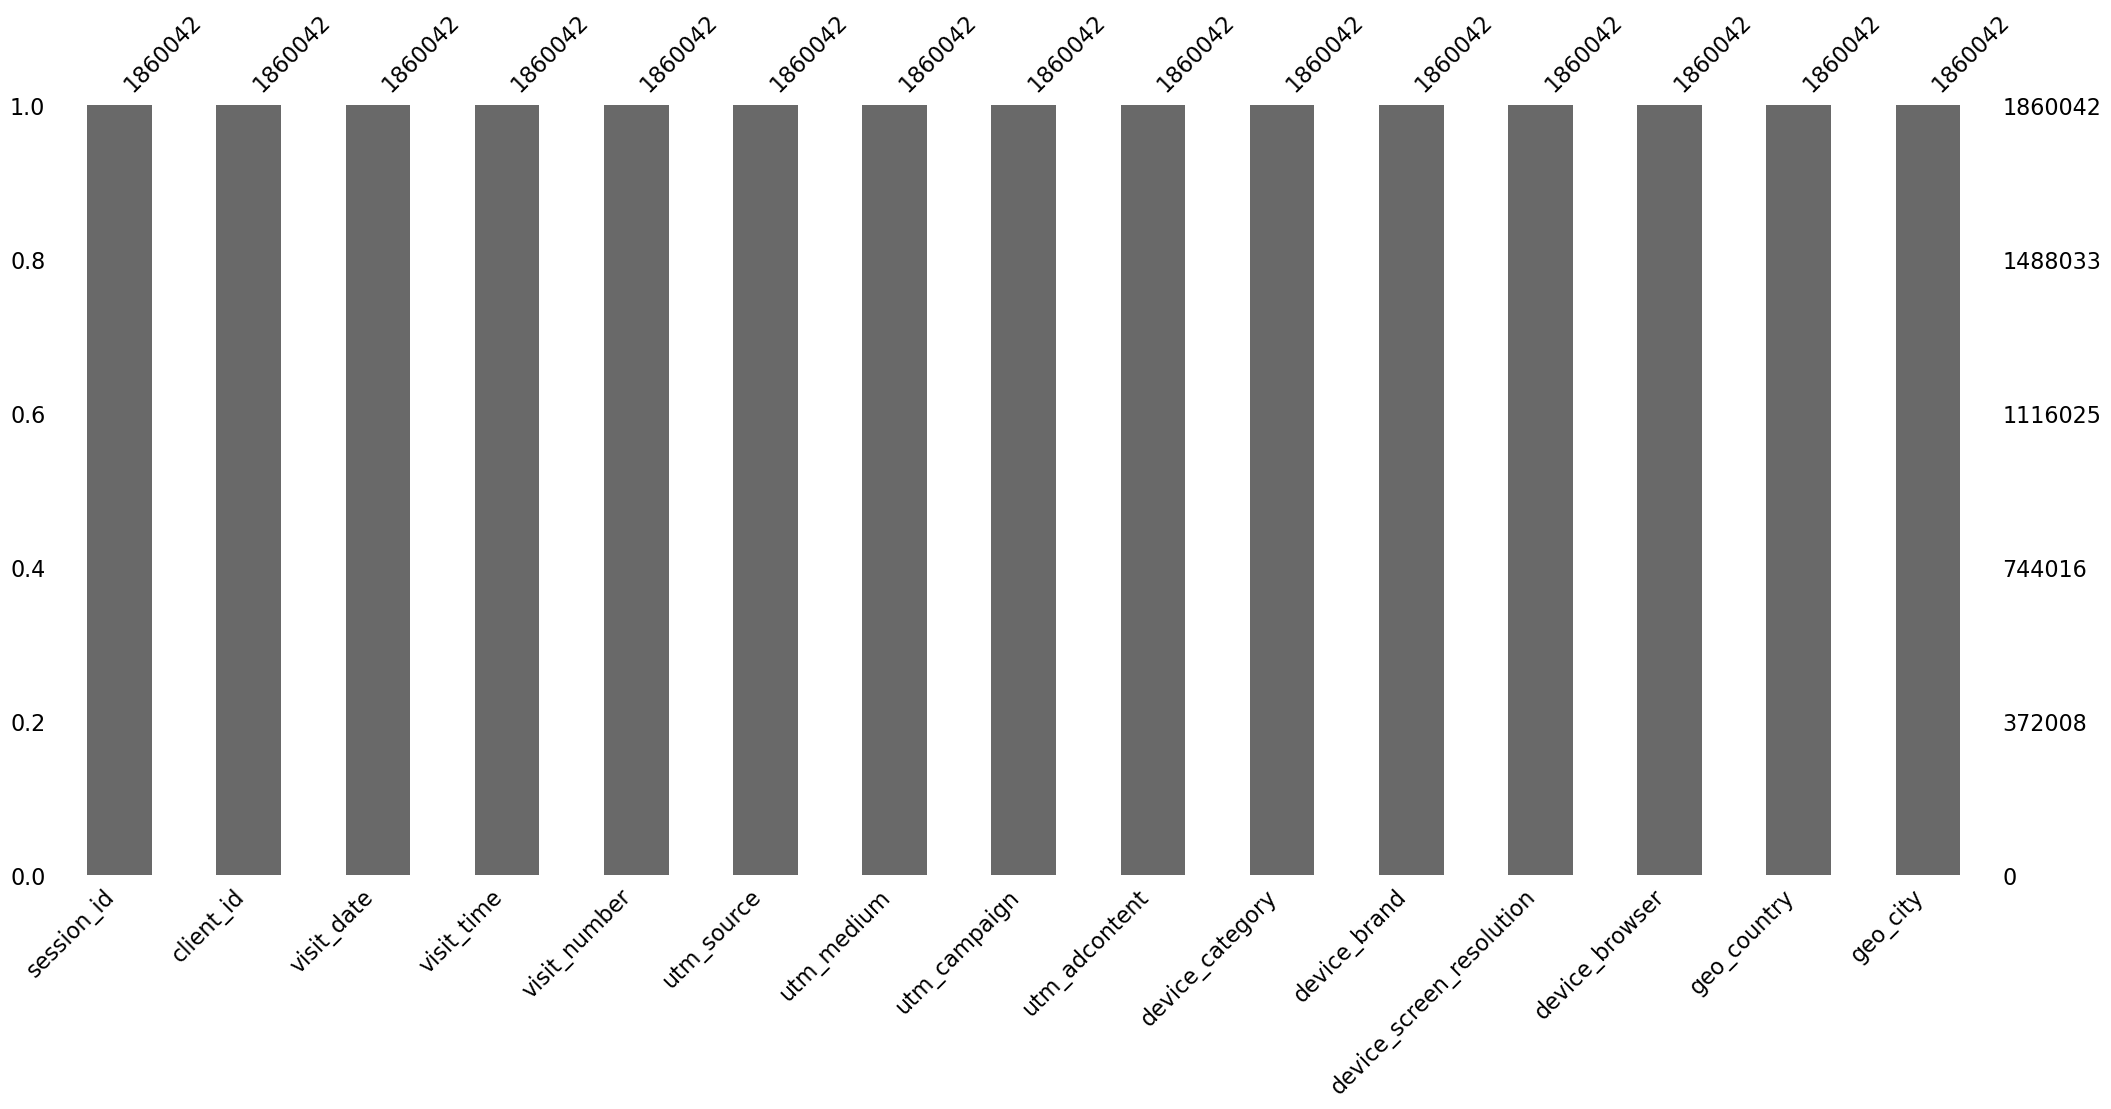

In [16]:
df_sessions['utm_campaign'] = df_sessions['utm_campaign'].fillna('other')
df_sessions['utm_adcontent'] = df_sessions['utm_adcontent'].fillna('other')
msno.bar(df_sessions)

In [17]:
df_sessions.isna().sum()

session_id                  0
client_id                   0
visit_date                  0
visit_time                  0
visit_number                0
utm_source                  0
utm_medium                  0
utm_campaign                0
utm_adcontent               0
device_category             0
device_brand                0
device_screen_resolution    0
device_browser              0
geo_country                 0
geo_city                    0
dtype: int64

###На датасете hits

<Axes: >

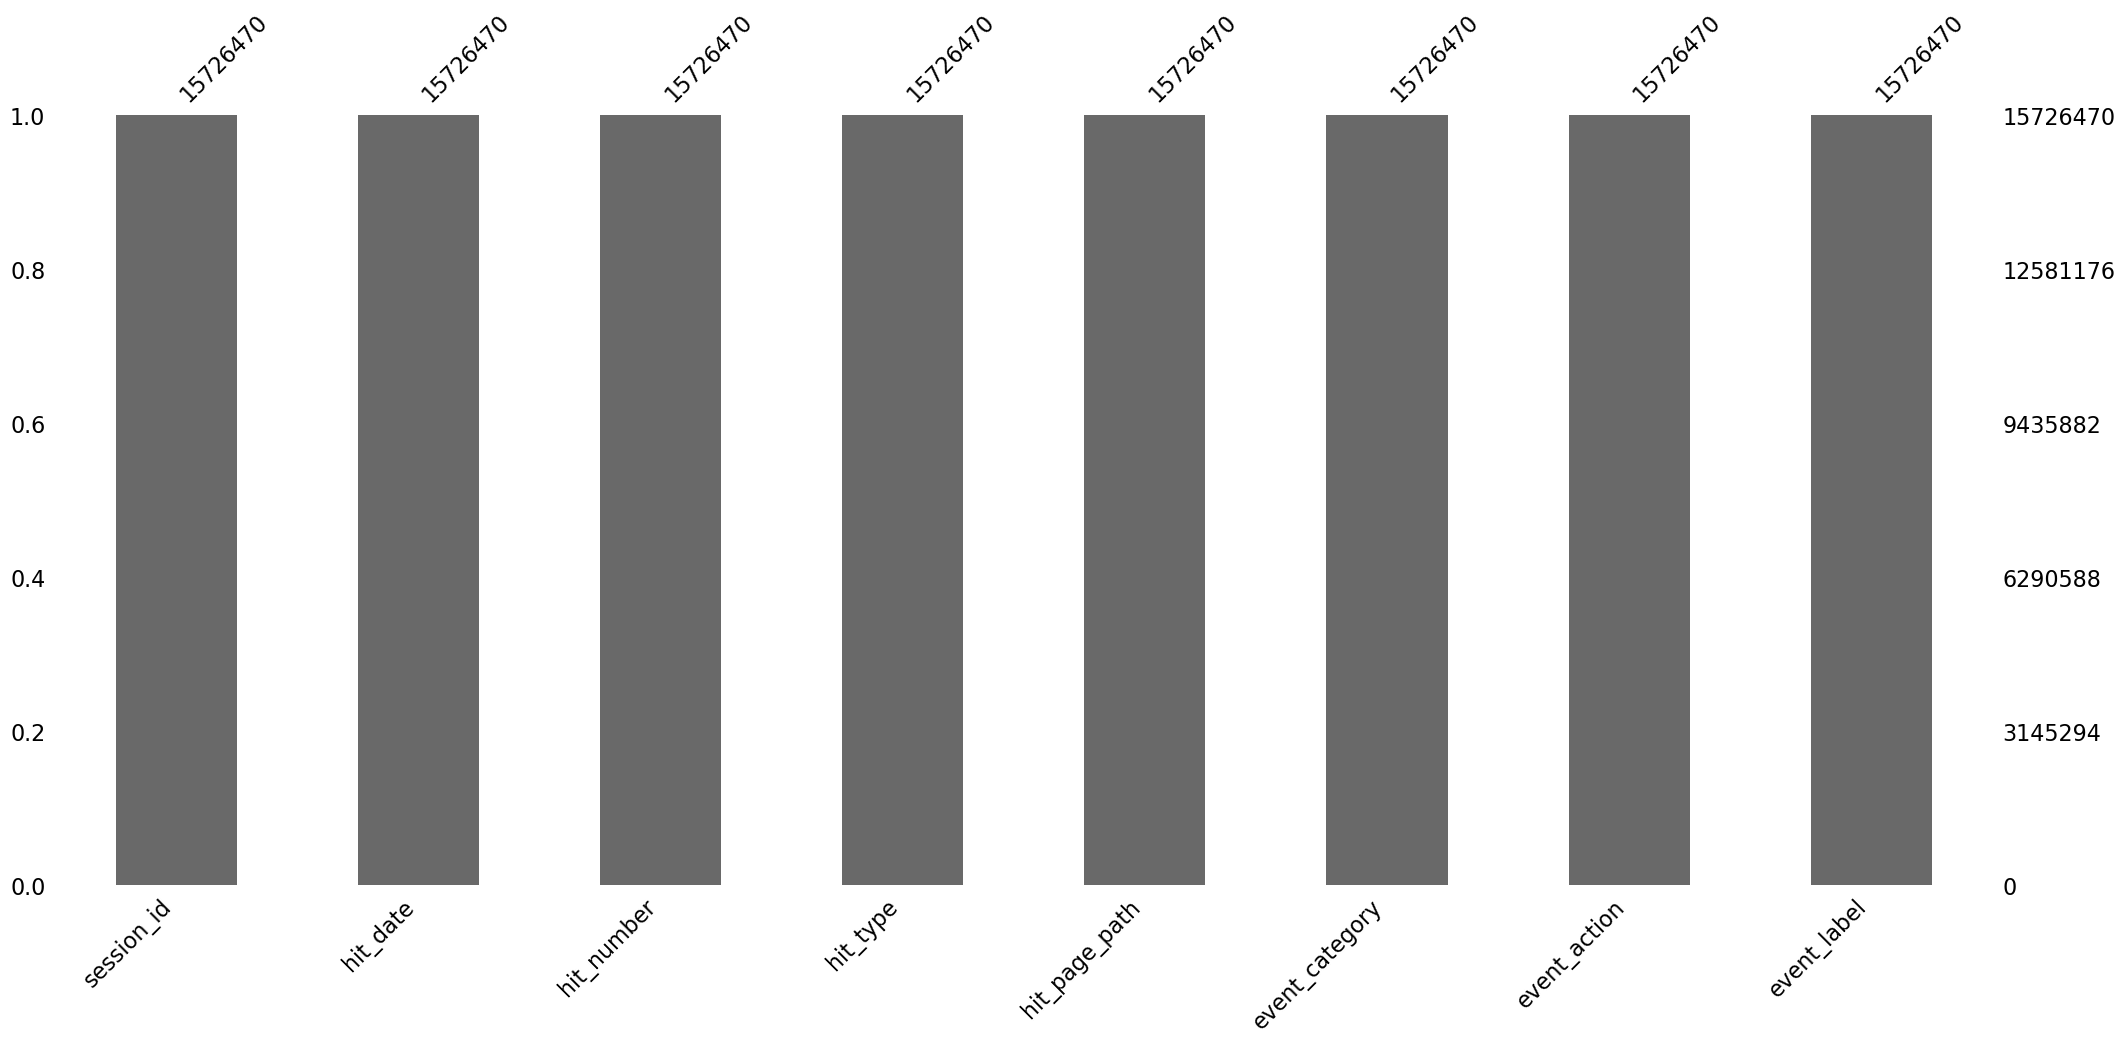

In [18]:
df_hits['event_label'] = df_hits['event_label'].fillna('other')
msno.bar(df_hits)

In [19]:
df_hits.isna().sum()

session_id        0
hit_date          0
hit_number        0
hit_type          0
hit_page_path     0
event_category    0
event_action      0
event_label       0
dtype: int64

#Задание по специализации

##Проверка гипотезы: > Органический трафик не отличается от платного с точки зрения CR(Conversion Rate) в целевые события.

###Проверка

In [20]:
df_sessions

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Apple,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Apple,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Apple,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,other,NOBKLgtuvqYWkXQHeYWM,mobile,Apple,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,other,other,mobile,Apple,393x786,Chrome,Russia,Moscow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,9055415581448263752.1640159305.1640159305,2108378238.164016,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,other,other,desktop,Tecno,1920x1080,Chrome,Russia,Moscow
1860038,9055421130527858185.1622007305.1622007305,2108379530.162201,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Tecno,390x844,Safari,Russia,Stavropol
1860039,9055422955903931195.1636979515.1636979515,2108379955.163697,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Sony,375x667,Safari,Russia,Moscow
1860040,905543020766873816.1638189404.1638189404,210838164.163819,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,393x851,Chrome,Russia,Chelyabinsk


In [21]:
df_hits

,session_id,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action,event_label
0,5639623078712724064.1640254056.1640254056,2021-12-23,30,event,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,other
1,7750352294969115059.1640271109.1640271109,2021-12-23,41,event,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,other
2,885342191847998240.1640235807.1640235807,2021-12-23,49,event,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,other
3,142526202120934167.1640211014.1640211014,2021-12-23,46,event,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,other
4,3450086108837475701.1640265078.1640265078,2021-12-23,79,event,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,other
...,...,...,...,...,...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,2021-12-23,43,event,sberauto.com/cars/all/toyota/fortuner/24cb5af2...,quiz,quiz_show,other
15726466,7310304587364460692.1640261783.1640261783,2021-12-23,40,event,sberauto.com/cars/all/mercedes-benz/gla-klasse...,quiz,quiz_show,other
15726467,8013702685784312179.1640270195.1640270195,2021-12-23,43,event,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,quiz,quiz_show,other
15726468,8021505554734405918.1640257821.1640257821,2021-12-23,45,event,sberauto.com/cars/all/bmw/x3/6a660f0a?rental_p...,quiz,quiz_show,other


In [22]:
df_union = pd.merge(df_sessions, df_hits, how='inner', left_on='session_id', right_on='session_id')
df_union

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,...,device_browser,geo_country,geo_city,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action,event_label
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,Chrome,Russia,Zlatoust,2021-11-24,3,event,podpiska.sberauto.com/,sub_page_view,sub_landing,other
1,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,Chrome,Russia,Zlatoust,2021-11-24,4,event,podpiska.sberauto.com/,sub_button_click,sub_view_cars_click,vodKSlUobUWTVlgsJqdI
2,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,...,Samsung Internet,Russia,Moscow,2021-11-14,3,event,podpiska.sberauto.com/,sub_page_view,sub_landing,other
3,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,Chrome,Russia,Krasnoyarsk,2021-12-28,10,event,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region,KWTCzSIXzoqUWjfUQMgP
4,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,Chrome,Russia,Krasnoyarsk,2021-12-28,13,event,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region,CBqnBQaKoQUyWJhLcxxN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15685214,9055430416266113553.1640968742.1640968742,2108381692.164097,2021-12-31,19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,desktop,...,Chrome,Russia,Moscow,2021-12-31,11,event,sberauto.com/cars/all/bmw/3-serii/bde2c9d5?utm...,card_web,view_card,other
15685215,9055430416266113553.1640968742.1640968742,2108381692.164097,2021-12-31,19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,desktop,...,Chrome,Russia,Moscow,2021-12-31,16,event,sberauto.com/cars/all/bmw/3-serii/bde2c9d5?utm...,card_web,view_new_card,other
15685216,9055430416266113553.1640968742.1640968742,2108381692.164097,2021-12-31,19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,desktop,...,Chrome,Russia,Moscow,2021-12-31,3,event,sberauto.com/cars/all/mercedes-benz/e-klasse/d...,card_web,view_card,other
15685217,9055430416266113553.1640968742.1640968742,2108381692.164097,2021-12-31,19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,desktop,...,Chrome,Russia,Moscow,2021-12-31,14,event,sberauto.com/cars/all/bmw/3-serii/bde2c9d5?utm...,card_web,view_card,other


In [23]:
# Целевые события - это:

target_hits = ['sub_car_claim_click', 'sub_car_claim_submit_click',
'sub_open_dialog_click', 'sub_custom_question_submit_click',
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
'sub_car_request_submit_click']

#Органический трафик - это:
organic_types = ['organic',
'referral', '(none)']


In [24]:
df_union['target_event'] = df_union['event_action'].isin(target_hits)
df_un_copy = df_union


In [25]:
df_union.to_csv('df_union.csv')

In [26]:
df_union['traffic_category'] = df_union['utm_medium'].apply(lambda x: 'organic' if x in organic_types else 'paid')

df_union

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,...,geo_city,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action,event_label,target_event,traffic_category
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,Zlatoust,2021-11-24,3,event,podpiska.sberauto.com/,sub_page_view,sub_landing,other,False,paid
1,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,Zlatoust,2021-11-24,4,event,podpiska.sberauto.com/,sub_button_click,sub_view_cars_click,vodKSlUobUWTVlgsJqdI,False,paid
2,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,...,Moscow,2021-11-14,3,event,podpiska.sberauto.com/,sub_page_view,sub_landing,other,False,paid
3,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,Krasnoyarsk,2021-12-28,10,event,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region,KWTCzSIXzoqUWjfUQMgP,False,paid
4,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,Krasnoyarsk,2021-12-28,13,event,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region,CBqnBQaKoQUyWJhLcxxN,False,paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15685214,9055430416266113553.1640968742.1640968742,2108381692.164097,2021-12-31,19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,desktop,...,Moscow,2021-12-31,11,event,sberauto.com/cars/all/bmw/3-serii/bde2c9d5?utm...,card_web,view_card,other,False,paid
15685215,9055430416266113553.1640968742.1640968742,2108381692.164097,2021-12-31,19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,desktop,...,Moscow,2021-12-31,16,event,sberauto.com/cars/all/bmw/3-serii/bde2c9d5?utm...,card_web,view_new_card,other,False,paid
15685216,9055430416266113553.1640968742.1640968742,2108381692.164097,2021-12-31,19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,desktop,...,Moscow,2021-12-31,3,event,sberauto.com/cars/all/mercedes-benz/e-klasse/d...,card_web,view_card,other,False,paid
15685217,9055430416266113553.1640968742.1640968742,2108381692.164097,2021-12-31,19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,desktop,...,Moscow,2021-12-31,14,event,sberauto.com/cars/all/bmw/3-serii/bde2c9d5?utm...,card_web,view_card,other,False,paid


In [27]:
#Расcчитываем CR для органич. трафика

organic_data = df_union[df_union['traffic_category'] == 'organic']
org_visits = organic_data['client_id'].count()
org_conv = organic_data['target_event'].sum()
organic_cr = org_conv / org_visits
print(organic_cr)

0.007163131941583139


In [28]:
#Расcчитываем CR для платного трафика

paid_data = df_union[df_union['traffic_category'] == 'paid']
paid_visits = paid_data['client_id'].count()
paid_conv = paid_data['target_event'].sum()
paid_cr = paid_conv / paid_visits
print(paid_cr)

0.006199043095561132


Сформируем нулевую гипотезу H0:
conversion rate для органического и платного трафика одинаковый


И альтернативную гипотезу H1: conversion rate для органического и платного трафика отличается

Уровенем значимости альфа будет 0.05

In [29]:
a = 0.05

###Результат

In [30]:
z, p_val = proportions_ztest([org_conv, paid_conv], [org_visits, paid_visits], alternative='two-sided')
if p_val<a:
    print('принимаем альтернативную гипотезу')
else:
    print('принимаем нулевую гипотезу')

принимаем альтернативную гипотезу


Мы принимаем альтернативную гипотезу, следовательно вывод:
CR для органического и платного трафика отличается


##Проверка гипотезы:> Трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события.

###Проверка

In [31]:
df_union = df_un_copy
df_union

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,...,geo_city,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action,event_label,target_event,traffic_category
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,Zlatoust,2021-11-24,3,event,podpiska.sberauto.com/,sub_page_view,sub_landing,other,False,paid
1,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,Zlatoust,2021-11-24,4,event,podpiska.sberauto.com/,sub_button_click,sub_view_cars_click,vodKSlUobUWTVlgsJqdI,False,paid
2,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,...,Moscow,2021-11-14,3,event,podpiska.sberauto.com/,sub_page_view,sub_landing,other,False,paid
3,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,Krasnoyarsk,2021-12-28,10,event,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region,KWTCzSIXzoqUWjfUQMgP,False,paid
4,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,Krasnoyarsk,2021-12-28,13,event,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region,CBqnBQaKoQUyWJhLcxxN,False,paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15685214,9055430416266113553.1640968742.1640968742,2108381692.164097,2021-12-31,19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,desktop,...,Moscow,2021-12-31,11,event,sberauto.com/cars/all/bmw/3-serii/bde2c9d5?utm...,card_web,view_card,other,False,paid
15685215,9055430416266113553.1640968742.1640968742,2108381692.164097,2021-12-31,19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,desktop,...,Moscow,2021-12-31,16,event,sberauto.com/cars/all/bmw/3-serii/bde2c9d5?utm...,card_web,view_new_card,other,False,paid
15685216,9055430416266113553.1640968742.1640968742,2108381692.164097,2021-12-31,19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,desktop,...,Moscow,2021-12-31,3,event,sberauto.com/cars/all/mercedes-benz/e-klasse/d...,card_web,view_card,other,False,paid
15685217,9055430416266113553.1640968742.1640968742,2108381692.164097,2021-12-31,19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,desktop,...,Moscow,2021-12-31,14,event,sberauto.com/cars/all/bmw/3-serii/bde2c9d5?utm...,card_web,view_card,other,False,paid


In [32]:
df_union.device_category.value_counts()

device_category
mobile     11595541
desktop     3945254
tablet       144424
Name: count, dtype: int64

In [33]:
# Рассчитаем CR для десктопных устройств

desktop_data = df_union[df_union['device_category'] == 'desktop']
desk_vis = desktop_data.session_id.count()
desk_conv = desktop_data.target_event.sum()
desk_cr = desk_conv / desk_vis
desk_cr

0.006398320615098547

In [34]:
# Рассчитаем CR для мобильных устройств

mobile_data = df_union[df_union['device_category'] == 'mobile']
mobile_vis = mobile_data.session_id.count()
mobile_conv = mobile_data.target_event.sum()
mobile_cr = mobile_conv/mobile_vis
mobile_cr

0.006626167765695451

Сформируем нулевую гипотезу H0: Трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события.

И альтернативную гипотезу H1: Трафик с мобильных устройств отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события.

Уровень значимости поставим alpha=0.5

In [35]:
a=0.05

###Результат

In [36]:
z, p_val = proportions_ztest([desk_conv, mobile_conv], [desk_vis, mobile_vis], alternative='two-sided')
if p_val<a:
    print('принимаем альтернативную гипотезу')
else:
    print('принимаем нулевую гипотезу')

принимаем альтернативную гипотезу


Мы принимаем альтернативную гипотезу, следовательно вывод: CR для мобильных и декстопных устройств различается

##Проверка гипотезы:Трафик из городов присутствия (Москва и область, Санкт-Петербург)не отличается от трафика из иных регионов с точки зрения CR(Conversion Rate) в целевые события.

###Проверка

In [37]:
df_union = df_un_copy
df_union

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,...,geo_city,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action,event_label,target_event,traffic_category
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,Zlatoust,2021-11-24,3,event,podpiska.sberauto.com/,sub_page_view,sub_landing,other,False,paid
1,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,Zlatoust,2021-11-24,4,event,podpiska.sberauto.com/,sub_button_click,sub_view_cars_click,vodKSlUobUWTVlgsJqdI,False,paid
2,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,...,Moscow,2021-11-14,3,event,podpiska.sberauto.com/,sub_page_view,sub_landing,other,False,paid
3,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,Krasnoyarsk,2021-12-28,10,event,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region,KWTCzSIXzoqUWjfUQMgP,False,paid
4,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,Krasnoyarsk,2021-12-28,13,event,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region,CBqnBQaKoQUyWJhLcxxN,False,paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15685214,9055430416266113553.1640968742.1640968742,2108381692.164097,2021-12-31,19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,desktop,...,Moscow,2021-12-31,11,event,sberauto.com/cars/all/bmw/3-serii/bde2c9d5?utm...,card_web,view_card,other,False,paid
15685215,9055430416266113553.1640968742.1640968742,2108381692.164097,2021-12-31,19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,desktop,...,Moscow,2021-12-31,16,event,sberauto.com/cars/all/bmw/3-serii/bde2c9d5?utm...,card_web,view_new_card,other,False,paid
15685216,9055430416266113553.1640968742.1640968742,2108381692.164097,2021-12-31,19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,desktop,...,Moscow,2021-12-31,3,event,sberauto.com/cars/all/mercedes-benz/e-klasse/d...,card_web,view_card,other,False,paid
15685217,9055430416266113553.1640968742.1640968742,2108381692.164097,2021-12-31,19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,desktop,...,Moscow,2021-12-31,14,event,sberauto.com/cars/all/bmw/3-serii/bde2c9d5?utm...,card_web,view_card,other,False,paid


In [38]:
df_union.geo_city.value_counts()

geo_city
Moscow                    6795118
Saint Petersburg          2365520
(not set)                  596279
Yekaterinburg              328301
Krasnodar                  293501
                           ...   
Mosonmagyarovar                 1
Kobelyaky                       1
Ridgefield Park                 1
Zhashkiv                        1
Bad Neuenahr-Ahrweiler          1
Name: count, Length: 2389, dtype: int64

In [39]:
centered_city = ['Moscow', 'Saint Petersburg']

In [40]:
df_union['city_category'] = df_union['geo_city'].apply(lambda x: 'centered' if x in centered_city else 'other')
df_union.city_category.value_counts()

city_category
centered    9160638
other       6524581
Name: count, dtype: int64

In [41]:
# Рассчитаем CR для городов присутсвия

centered_data = df_union[df_union['city_category'] == 'centered']
centered_vis = centered_data.session_id.count()
centered_conv = centered_data.target_event.sum()
centered_cr = centered_conv/centered_vis
centered_cr

0.0070939382169669845

In [42]:
# Рассчитаем CR для остальных городов

other_data = df_union[df_union['city_category'] == 'other']
other_vis = other_data.session_id.count()
other_conv = other_data.target_event.sum()
other_cr = other_conv/other_vis
other_cr

0.005802211666925431

Сформулируем нулевую гипотезу H0: Трафик из городов присутствия (Москва и область, Санкт-Петербург)не отличается от трафика из иных регионов с точки зрения CR(Conversion Rate) в целевые события.

И альтернативную гипотезу H1: Трафик из городов присутствия (Москва и область, Санкт-Петербург) отличается от трафика из иных регионов с точки зрения CR(Conversion Rate) в целевые события.

Уровень значимости поставим alpha = 0.05

In [43]:
a=0.05

###Результат

In [44]:
z, p_val = proportions_ztest([centered_conv, other_conv], [centered_vis, other_vis], alternative='two-sided')
if p_val<a:
    print('принимаем альтернативную гипотезу')
else:
    print('принимаем нулевую гипотезу')

принимаем альтернативную гипотезу


Мы принимаем альтернативную гипотезу, следовательно вывод: CR для городов присутсвия и иных регионов различается

#Дальнейшие задания в следующем файле. (объединенный датафрейм df_union я сохранял на этапе "Проверка гипотезы: > Органический трафик не отличается от платного с точки зрения CR(Conversion Rate) в целевые события.")